# Importing necessary modules and libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

## MNIST

70,000 small images of digits handwritten by school students and employees of the US Census Bureau.

sklearn provides many helper functions to download popular datasets. MNIST is one of them.

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

C:\Users\Divya Tiwari\anaconda3\envs\ds\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,y = mnist['data'], mnist['target']
print('Shape of data: ', X.shape)
print('Shape of target: ', y.shape)

Shape of data:  (70000, 784)
Shape of target:  (70000,)


Each image is 28X28 pixels, hence, 784 features and each feature simply represents one pixel's intensity, from 0 to 255.

To take a peek at one digit from the dataset we just need to grab an instance's feature vector, reshape it to 28X28 array, and display it using imshow().

In [5]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


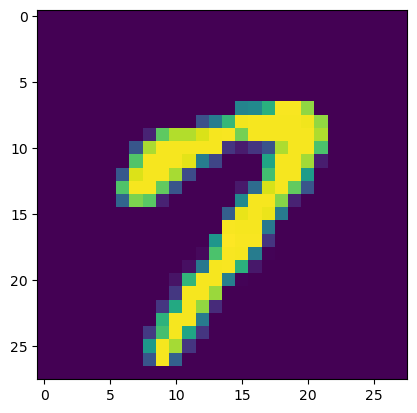

In [6]:
some_digit = X.iloc[15]
some_digit_image = np.array(some_digit).reshape((28,28))
plt.imshow(some_digit_image)

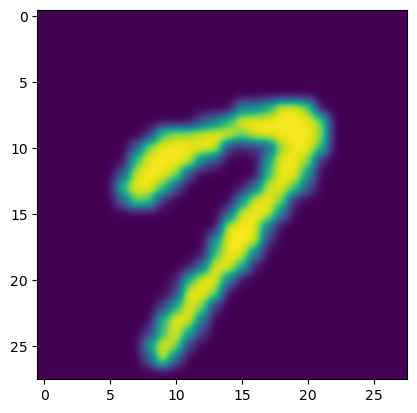

In [7]:
some_digit = X.iloc[15]
some_digit_image = np.array(some_digit).reshape((28,28))
plt.imshow(some_digit_image, interpolation = 'gaussian')
#plt.imshow(some_digit_image, cmap=mpl.cm.binary)

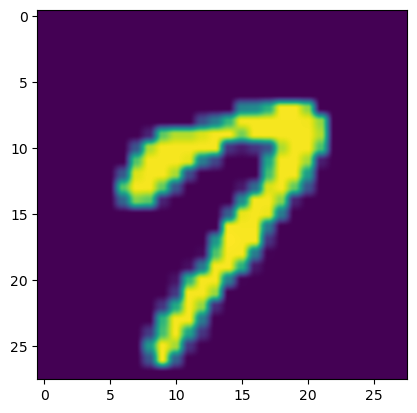

In [8]:
some_digit = X.iloc[15]
some_digit_image = np.array(some_digit).reshape((28,28))
plt.imshow(some_digit_image, interpolation = 'hanning')

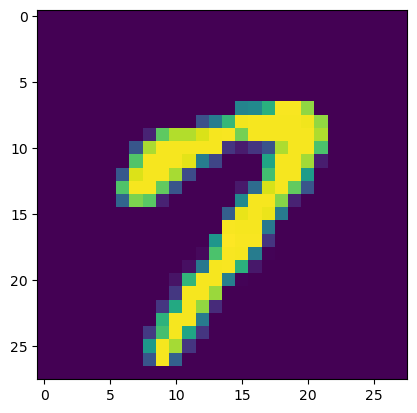

In [9]:
some_digit = X.iloc[15]
some_digit_image = np.array(some_digit).reshape((28,28))
plt.imshow(some_digit_image, interpolation = 'nearest')

In [10]:
y[15]

'7'

In [11]:
y = y.astype(int)

In [12]:
X_train, X_test, y_train, y_test = X.iloc[:60000], X.iloc[60000:], y.iloc[:60000], y.iloc[60000:]

## Training a binary classifier

'7' detector:

Distinguishes between two classes- '7' and 'not-7'.

In [13]:
y_train_7 = (y_train == 7)  # True for all 7s, False for all other digits
y_test_7 = (y_test == 7)  

Stochastic Gradient Descent (SGD) Classifier has the advantage of being capable of handling very large datasets efficiently.

SGD deals with training instances independantly, one at a time (which also makes SGD well suited for online learning).

In [14]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_7)

SGDClassifier(random_state=42)

In [15]:
sgd_clf.predict([some_digit])

C:\Users\Divya Tiwari\anaconda3\envs\ds\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_7, cv=3, scoring="accuracy")

array([0.98105, 0.9735 , 0.95335])

# Performance Measure

## Measuring Accuracy using Cross-Validation

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

In [15]:
for train_index, test_index in skfolds.split(X_train, y_train_7):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_7.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_7.iloc[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.978
0.96965
0.97675


The StratifiedKFold class performs stratified sampling to produce folds that contain a representative ratio of each class. At each iteration the code creates a clone of the classifier, trains the clone on the training folds, and makes predictions on the test fold. Then it counts the number of correct predictions and output the ratio of correct predictions.

In [16]:
from sklearn.base import BaseEstimator

class Never7Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype = bool)

In [17]:
never_7_clf = Never7Classifier()
cross_val_score(never_7_clf, X_train, y_train_7, cv = 3, scoring = 'accuracy')

array([0.89535, 0.8984 , 0.893  ])

This demnostrates why accuracy is generally not preferred performance measure for classifiers, especially while dealing with skewed datasets.

## Confusion Matrix

Each row in a confusion matrix represents an actual class, while each column represents a predicted class.

In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_7, cv = 3)

cross_val_predict() performs K-fold cross-validation, and returns the prediction made on each test fold.

In [18]:
y_train_pred.shape

(60000,)

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_7, y_train_pred)

array([[52581,  1154],
       [  688,  5577]], dtype=int64)

The first row of the matrix considers the negative class: 'not 7' and 52581 of them are correctly classified as not 7 (*True Negative*) while 1154 were wrongly classified as 7 (*False Positive*). 

The second row considers the positive class: 'is 7'. 5577 are correctly classified as 7 (*True Positive*) and 688 are wrongly classified as not 7 (*False Negative*)
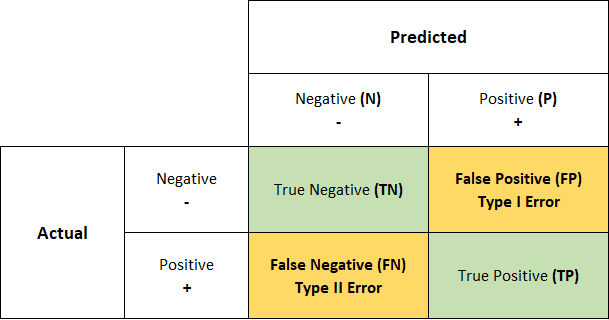

https://miro.medium.com/v2/resize:fit:1218/1*jMs1RmSwnYgR9CsBw-z1dw.png

In [20]:
y_pred = sgd_clf.predict(X_train)

confusion_matrix(y_train_7, y_pred)

array([[53432,   303],
       [  556,  5709]], dtype=int64)

**Precision**: the accuracy of the positive predictions is called the precision of the classifier.

precision = ratio of TP to Predicted Positives

Precision is typically used along with another metric named *recall*, also called *sensitivity* or *true positive rate (TPR)* 

**Recall**: the ratio of positive instances that are correctly detected by the classifier.

recall = ratio of TP to Actual Positives

## Precision and Recall



In [21]:
from sklearn.metrics import precision_score, recall_score

print('Precision score: ', precision_score(y_train_7, y_train_pred))
print('Recall score: ', recall_score(y_train_7, y_train_pred))

Precision score:  0.8285544495617293
Recall score:  0.8901835594573024


It is often convenient to combine precision and recall into a single metric called the F1 score if you need a single way to compare two classifiers.

F1 score is the harmonic mean of precision and recall.

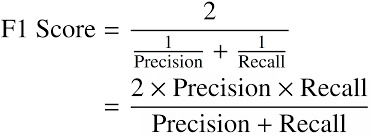

The harmonic mean gives much more weight to low values. As a result, the classifier will only get a high F1 score if both recall and precision are high.

In [22]:
from sklearn.metrics import f1_score
f1_score(y_train_7,y_train_pred)

0.8582640812557709

Increasing precision reduces recall, and vice versa. This is called precision/recall tradeoff.

### Precision/Recall Tradeoff

How does the SGDClassifier makes its classification decisions: for each instance, it computes a score based on a *decision function*, and if that score is greater than a threshold, it assigns the instance to the positive class, or else to the negative class.

Scikit-Learn doesn't let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions.

Instead of calling classifier's predict() method, you can call its decision_function() method, which returns a score for each instance, and then make predictions based on those scores using any threshold you want.

In [23]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

C:\Users\Divya Tiwari\anaconda3\envs\ds\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([5876.33635387])

In [24]:
threshold = 0
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

The SGDClassifier uses a threshold equal to 0.

In [25]:
threshold = 8000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

To decide which threshold to use:

In [26]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_7, cv = 3,
                            method = 'decision_function')

In [27]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_7, y_scores)

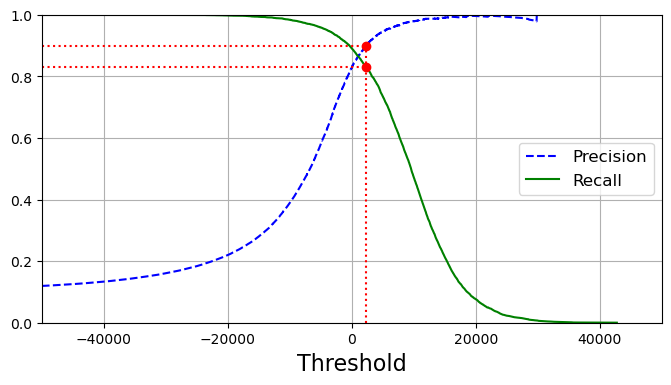

In [28]:
# Plot precision and recall as a function of the threshold value

def precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
    plt.plot(thresholds, recalls[:-1],'g-', label = 'Recall')
    plt.legend(loc="center right", fontsize=12)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))
precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()

In [29]:
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print(recall_90_precision)
print(threshold_90_precision)

0.8311252992817239
2288.7247681662343


In [30]:
(y_train_pred == (y_scores > 0)).all()

True

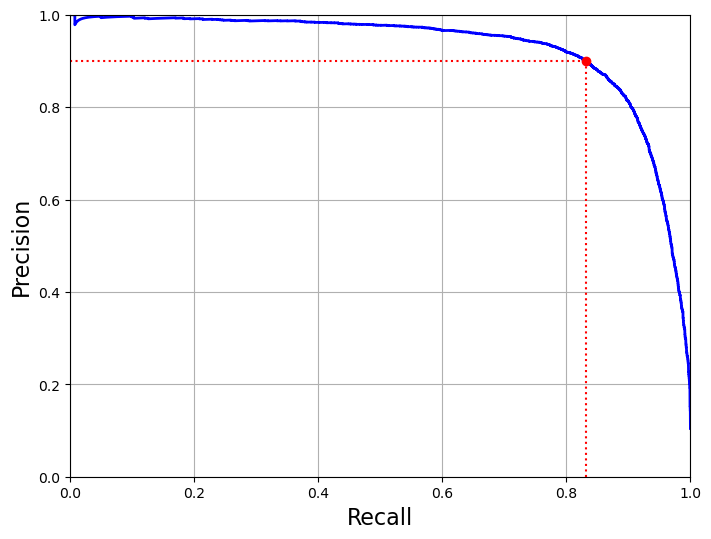

In [31]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [32]:
# Aiming for 95% precison

threshold_95_precision = thresholds[np.argmax(precisions >= 0.95)]

y_train_pred_95 = (y_scores >= threshold_95_precision)

In [33]:
precision_score(y_train_7, y_train_pred_95)

0.9501167480365103

In [34]:
recall_score(y_train_7, y_train_pred_95)

0.7144453312051078

## The ROC Curve

The *Receiver Operating Characteristic (ROC) Curve* is another common tool used with binary classifiers.

The ROC curve plots the *true positive rate* (another name for recall) against *false positive rate*.

The FPR is the ratio of negative instances that are incorrectly classified as positive, i.e. the ratio of FP to actual negatives. It is equal to 1 - *True Negative Rate*, which is the ratio of negative instances correctly classified as negative.

The TNR is also called specificity.

Hence, the ROC curve plots sensitivity (recall) versus 1 - specificity.

In [35]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_7, y_scores)

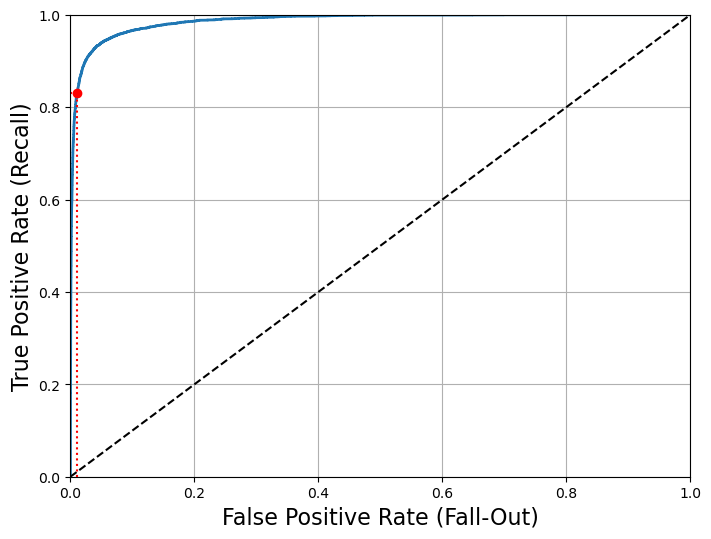

In [37]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.show()

The higher the recall (TPR), the more FPR the classifier produces.

The dotted line represents the ROC curve of a purely random classifer; a good classifier stays as far away from  this line as possible (toward the top-left corner).

One way to compare classifiers is to measure the *Area Under the Curve (AUC)*. 

A perfect classifier will have ROC AUC = 1, whereas a purely random classifier will have a ROC AUC = 0.5

In [38]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_7, y_scores)

0.986670497551944

As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care about the false positive than the false negatives, and the ROC curve otherwise.

In [39]:
# Train a RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probs_forest = cross_val_predict(forest_clf, X_train, y_train_7, cv = 3,
                                  method = 'predict_proba')

In [46]:
forest_clf.fit(X_train, y_train_7)
y_pred_forest = forest_clf.predict(X_train)

In [41]:
# Using positive class's probability as the score

y_scores_forest = y_probs_forest[:, 1]  # score = proba of positive class

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_7, y_scores_forest)

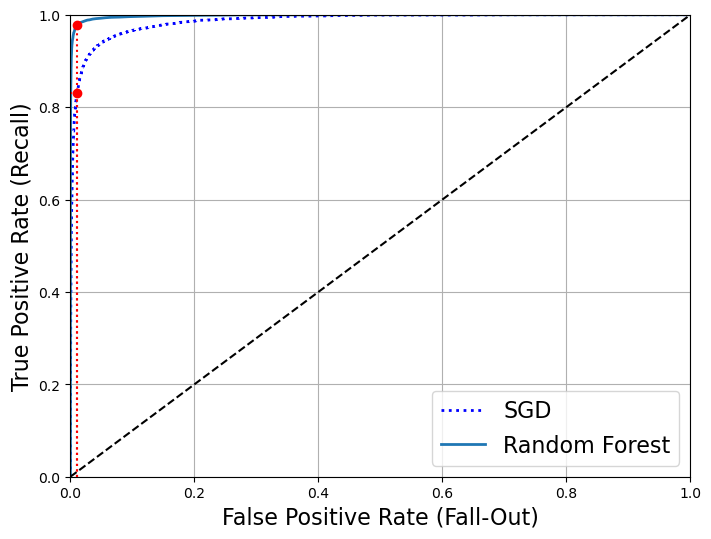

In [42]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [43]:
roc_auc_score(y_train_7, y_scores_forest)

0.9982747530426836

In [47]:
print('Precision score: ', precision_score(y_train_7, y_pred_forest))
print('Recall score: ', recall_score(y_train_7, y_pred_forest))

Precision score:  1.0
Recall score:  1.0


In [48]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_7, cv = 3)

In [49]:
print('Precision score: ', precision_score(y_train_7, y_train_pred_forest))
print('Recall score: ', recall_score(y_train_7, y_train_pred_forest))

Precision score:  0.9867364746945899
Recall score:  0.9024740622505986
